In [156]:
from binance_historical_data import BinanceDataDumper

data_dumper = BinanceDataDumper(
    path_dir_where_to_dump=".",
    asset_class="spot",  # spot, um, cm
    data_type="klines",  # aggTrades, klines, trades
    data_frequency="1m",
)

print(data_dumper.get_list_all_trading_pairs())

data_dumper.dump_data(tickers=["NEARUSDT"])

['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH', 'EOSETH', 'SNTETH', 'BNTETH', 'BCCBTC', 'GASBTC', 'BNBETH', 'BTCUSDT', 'ETHUSDT', 'HSRBTC', 'OAXETH', 'DNTETH', 'MCOETH', 'ICNETH', 'MCOBTC', 'WTCBTC', 'WTCETH', 'LRCBTC', 'LRCETH', 'QTUMBTC', 'YOYOBTC', 'OMGBTC', 'OMGETH', 'ZRXBTC', 'ZRXETH', 'STRATBTC', 'STRATETH', 'SNGLSBTC', 'SNGLSETH', 'BQXBTC', 'BQXETH', 'KNCBTC', 'KNCETH', 'FUNBTC', 'FUNETH', 'SNMBTC', 'SNMETH', 'NEOETH', 'IOTABTC', 'IOTAETH', 'LINKBTC', 'LINKETH', 'XVGBTC', 'XVGETH', 'SALTBTC', 'SALTETH', 'MDABTC', 'MDAETH', 'MTLBTC', 'MTLETH', 'SUBBTC', 'SUBETH', 'EOSBTC', 'SNTBTC', 'ETCETH', 'ETCBTC', 'MTHBTC', 'MTHETH', 'ENGBTC', 'ENGETH', 'DNTBTC', 'ZECBTC', 'ZECETH', 'BNTBTC', 'ASTBTC', 'ASTETH', 'DASHBTC', 'DASHETH', 'OAXBTC', 'ICNBTC', 'BTGBTC', 'BTGETH', 'EVXBTC', 'EVXETH', 'REQBTC', 'REQETH', 'VIBBTC', 'VIBETH', 'HSRETH', 'TRXBTC', 'TRXETH', 'POWRBTC', 'POWRETH', 'ARKBTC', 'ARKETH', 'YOYOETH', 'XRPBTC', 'XRPETH', 'MODBTC', 'MODETH', 'ENJBTC', 'ENJETH', 'STORJBTC', 'ST

Tickers:   0%|          | 0/1 [00:00<?, ?it/s]

monthly files to download:   0%|          | 0/1 [00:00<?, ?files/s]

daily files to download: 0files [00:00, ?files/s]

In [157]:
import pandas as pd
import numpy as np
import os

filenames = next(os.walk("./spot/monthly/klines/NEARUSDT/1m"), (None, None, []))[2]  # [] if no file

columns = [
    "Open time",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Close time",
    "Quote asset volume",
    "Number of trades",
    "Taker buy base asset volume",
    "Taker buy quote asset volume",
    "Ignore"
]

df = pd.DataFrame(columns=columns)

for f in filenames:
    new_df = pd.read_csv(f"./spot/monthly/klines/NEARUSDT/1m/{f}", header=None, names=columns)
    df = pd.concat([df, new_df])
df = df.sort_values(by="Open time")
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1602651600000,1.3000,1.8800,1.3000,1.3760,1429560.44,1602651659999,2.313165e+06,1848,520043.50,837306.088337,0
1,1602651660000,1.3759,1.4000,1.1111,1.2493,987505.68,1602651719999,1.205528e+06,1392,614158.78,747451.518743,0
2,1602651720000,1.2489,1.3593,1.1660,1.2552,549711.33,1602651779999,6.942747e+05,1103,277203.12,349648.438905,0
3,1602651780000,1.2499,1.2500,1.1359,1.1742,343258.80,1602651839999,4.081314e+05,773,170461.39,202748.271257,0
4,1602651840000,1.1754,1.2752,1.1753,1.2300,243382.88,1602651899999,2.965310e+05,440,170472.03,207510.362489,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44635,1690847700000,1.3710,1.3710,1.3690,1.3690,5932.20,1690847759999,8.131457e+03,23,0.00,0.000000,0
44636,1690847760000,1.3690,1.3690,1.3690,1.3690,81.30,1690847819999,1.112997e+02,3,81.30,111.299700,0
44637,1690847820000,1.3690,1.3700,1.3690,1.3690,1278.00,1690847879999,1.749664e+03,10,438.10,599.840400,0
44638,1690847880000,1.3690,1.3700,1.3690,1.3700,468.60,1690847939999,6.415331e+02,6,468.60,641.533100,0


In [158]:
OHLC_COLUMNS = [
    "Open",
    "High",
    "Low",
    "Close"]
dataset = df.loc[:, OHLC_COLUMNS].astype(np.float64)
dataset = pd.DataFrame(dataset.to_numpy(), columns=OHLC_COLUMNS)

# add technical indicators to dataset
dataset['SMA_512'] = dataset['Close'].rolling(window=512).mean()
dataset['SMA_1024'] = dataset['Close'].rolling(window=1024).mean()
dataset['SMA_4096'] = dataset['Close'].rolling(window=4096).mean()

# convert SMA columns to distance in percentages from "Close"
dataset['SMA_512'] = ((dataset['Close'] - dataset['SMA_512']) / dataset['SMA_512'])
dataset['SMA_1024'] = ((dataset['Close'] - dataset['SMA_1024']) / dataset['SMA_1024'])
dataset['SMA_4096'] = ((dataset['Close'] - dataset['SMA_4096']) / dataset['SMA_4096'])

# drop NaN rows resulting from the SMA calculations and reset index
dataset = dataset.dropna().reset_index(drop=True)
dataset

,Open,High,Low,Close,SMA_512,SMA_1024,SMA_4096
0,0.7531,0.7540,0.7506,0.7512,-0.105323,-0.144309,-0.302967
1,0.7521,0.7547,0.7504,0.7504,-0.105994,-0.145028,-0.303611
2,0.7527,0.7582,0.7526,0.7581,-0.096551,-0.136071,-0.296387
3,0.7585,0.7604,0.7583,0.7599,-0.094172,-0.133838,-0.294637
4,0.7600,0.7611,0.7593,0.7606,-0.093092,-0.132856,-0.293921
...,...,...,...,...,...,...,...
1464416,1.3710,1.3710,1.3690,1.3690,-0.001843,-0.010031,-0.020798
1464417,1.3690,1.3690,1.3690,1.3690,-0.001824,-0.010010,-0.020793
1464418,1.3690,1.3700,1.3690,1.3690,-0.001804,-0.009989,-0.020788
1464419,1.3690,1.3700,1.3690,1.3700,-0.001057,-0.009247,-0.020067


In [159]:
from sklearn.preprocessing import MinMaxScaler


def preprocess(df):
    # Apply percentage change only to OHLC columns
    df_pct = df[OHLC_COLUMNS].pct_change()

    # Concatenate the percentage-changed OHLC with the other columns
    df_all = pd.concat([df_pct, df.drop(columns=OHLC_COLUMNS)], axis=1)

    # Drop NA values (from pct_change operation)
    df_all = df_all.dropna().reset_index(drop=True)

    # Apply MinMax scaling to all columns
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = pd.DataFrame(scaler.fit_transform(df_all), columns=df_all.columns, index=df_all.index)

    return df_scaled, scaler


def invert_preprocess(original_start, scaler: MinMaxScaler, df):
    original_start = original_start[OHLC_COLUMNS].to_numpy()
    # Invert MinMax scaling for all columns
    df_inv_scaled = pd.DataFrame(scaler.inverse_transform(df), columns=df.columns, index=df.index)

    # Recover the original OHLC values
    reversed_array = np.cumprod(1 + df_inv_scaled[OHLC_COLUMNS].to_numpy(), axis=0)
    reversed_array = reversed_array * original_start  # Scaling by the original_start to each element

    df_inv_scaled[OHLC_COLUMNS] = reversed_array

    return df_inv_scaled


preprocessed_dataset, scaler = preprocess(dataset)
preprocessed_dataset

,Open,High,Low,Close,SMA_512,SMA_1024,SMA_4096
0,0.120741,0.119124,0.207329,0.115147,0.266599,0.253977,0.155452
1,0.123285,0.123157,0.212466,0.128823,0.274854,0.261623,0.161966
2,0.131553,0.121269,0.219921,0.119300,0.276933,0.263528,0.163544
3,0.124697,0.119115,0.209875,0.117545,0.277877,0.264367,0.164189
4,0.122488,0.116686,0.188298,0.108813,0.273096,0.259854,0.160239
...,...,...,...,...,...,...,...
1464415,0.122330,0.118115,0.205414,0.114672,0.357639,0.369208,0.410454
1464416,0.120584,0.116528,0.207757,0.116433,0.357655,0.369226,0.410459
1464417,0.122330,0.118909,0.207757,0.116433,0.357672,0.369244,0.410463
1464418,0.122330,0.118115,0.207757,0.117315,0.358326,0.369878,0.411113


In [160]:
from sklearn.metrics import mean_absolute_error


def test_preprocess_invert_preprocess(original_df):
    original_df = original_df.iloc[:8000]
    preprocessed_df, scaler = preprocess(original_df)

    # Assume that 'original_start' is the first row of the original DataFrame
    original_start = original_df.iloc[0]

    inverted_df = invert_preprocess(original_start, scaler, preprocessed_df)

    mae_list = []
    for col in original_df.columns:
        # Start from the second row of the original_df for comparison
        mae = mean_absolute_error(original_df.iloc[1:][col], inverted_df[col])
        mae_list.append(mae)
        print(f"Mean Absolute Error for {col}: {mae}")

    avg_mae = sum(mae_list) / len(mae_list)
    print(f"Average MAE: {avg_mae}")

    return avg_mae < 1e-9


# Assuming 'dataset' is your original DataFrame
assert test_preprocess_invert_preprocess(dataset)

Mean Absolute Error for Open: 1.8611607233914956e-15
Mean Absolute Error for High: 4.527652995199361e-15
Mean Absolute Error for Low: 5.1052909729322e-15
Mean Absolute Error for Close: 3.327615578870875e-15
Mean Absolute Error for SMA_512: 4.443312785027727e-18
Mean Absolute Error for SMA_1024: 5.520732658070965e-18
Mean Absolute Error for SMA_4096: 8.872988884950288e-18
Average MAE: 2.1200796149602832e-15


<Axes: xlabel='time'>

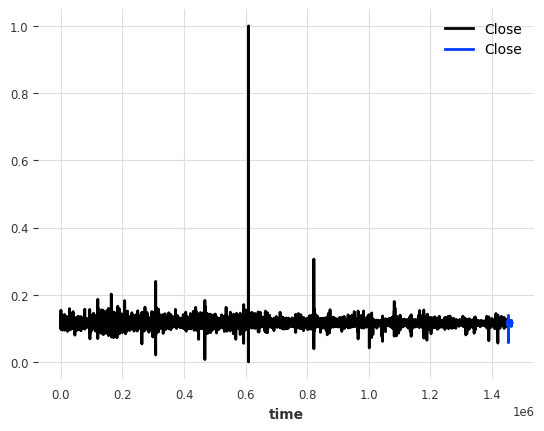

In [165]:
import numpy as np
import pandas as pd

from darts import TimeSeries
from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import Scaler, InvertibleMapper
from darts.models import RNNModel, TFTModel
from darts.metrics import mape, mase
from darts.utils.likelihood_models import GaussianLikelihood

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

target_series = TimeSeries.from_dataframe(preprocessed_dataset)
target_train, target_val = target_series.split_after(0.99)

target_train["Close"].plot()
target_val["Close"].plot()

In [166]:
SEQUENCE_LENGTH = 128
PREDICTION_LENGTH = 32
my_model = RNNModel(
    model="LSTM",
    hidden_dim=32,
    n_rnn_layers=4,
    dropout=0.1,
    batch_size=512,
    n_epochs=1,
    # optimizer_kwargs={"lr": 1e-3},
    random_state=0,
    training_length=SEQUENCE_LENGTH,
    input_chunk_length=SEQUENCE_LENGTH,
    # likelihood=GaussianLikelihood(),
)

# my_model = TFTModel(
#     input_chunk_length=SEQUENCE_LENGTH,
#     output_chunk_length=PREDICTION_LENGTH,
#     hidden_size=128,
#     lstm_layers=2,
#     num_attention_heads=4,
#     dropout=0.1,
#     batch_size=512,
#     n_epochs=1,
#     add_relative_index=True,
#     add_encoders=None,
#     random_state=42,
# )

# my_model = TFTModel.load("model-weights/model-weights-1693574498.596941.pt")

my_model.fit(target_train, val_series=target_val, verbose=True)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

RNNModel(model=LSTM, hidden_dim=32, n_rnn_layers=4, dropout=0.1, training_length=128, batch_size=512, n_epochs=1, random_state=0, input_chunk_length=128)

In [167]:
# from google.colab import drive
# drive.mount('/content/drive')
# 
# import time
# import os
# os.makedirs("./drive/MyDrive/colab/model-weights/")
# my_model.save(f"./drive/MyDrive/colab/model-weights/model-weights-{time.time()}.pt")

In [187]:
# evaluate model
FORECAST_HORIZON = 30
forecasts = my_model.historical_forecasts(
    target_val,
    forecast_horizon=FORECAST_HORIZON,
    # metric=mase,
    verbose=False,
    retrain=False,
    # stride=5,
)
close_forecasts = forecasts["Close"]
close_series = target_val[SEQUENCE_LENGTH + FORECAST_HORIZON - 1:]["Close"]
print(f"MASE = {mase(close_forecasts, close_series)}")

TypeError: 'NoneType' object is not iterable

Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='time'>

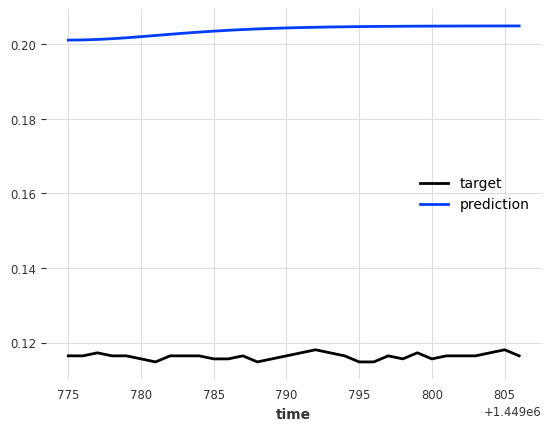

In [171]:
predict_X = target_train[-SEQUENCE_LENGTH:]
pred: TimeSeries = my_model.predict(PREDICTION_LENGTH, predict_X)

target_val["Close"].slice_intersect(pred["Close"]).plot(label="target")
pred["Close"].plot(label="prediction")

In [172]:
original_start = dataset.iloc[predict_X[-1].time_index].to_numpy()

inverted_pred = invert_preprocess(original_start, scaler, pred.pd_dataframe())
inverted_pred

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
inverted_target = invert_preprocess(original_start, scaler, target_val.pd_dataframe()[:PREDICTION_LENGTH])
inverted_target

In [ ]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Create a DataFrame from the 'candlesticks' array
candlesticks_df = pd.DataFrame(inverted_target, columns=OHLC_COLUMNS)
candlesticks_pred_df = pd.DataFrame(inverted_pred, columns=OHLC_COLUMNS)

plt.plot(candlesticks_df["Close"], label="actual")
plt.plot(candlesticks_pred_df["Close"], label="prediction")
plt.legend()

# Adding a fake date index (mplfinance needs this)
# candlesticks_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_df.shape[0])
# candlesticks_df['Date'] = candlesticks_df['Date'].apply(mdates.date2num)
# candlesticks_pred_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_pred_df.shape[0])
# candlesticks_pred_df['Date'] = candlesticks_pred_df['Date'].apply(mdates.date2num)
# 
# # Reordering columns to fit mplfinance requirements
# candlesticks_df = candlesticks_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
# candlesticks_pred_df = candlesticks_pred_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Plotting
# fig, ax = plt.subplots(figsize=(15, 10))

# candlestick_ohlc(ax, candlesticks_pred_df.values, width=0.6, colorup='lime', colordown='magenta', alpha=0.5)
# candlestick_ohlc(ax, candlesticks_df.values, width=0.6, colorup='g', colordown='r', alpha=0.5)

plt.show()